In [1]:
import numpy as np
import keras 
from keras.layers import Dense,Input,Convolution2D, MaxPooling2D, Flatten,Dropout
from keras.models import Model
from keras import optimizers

Using TensorFlow backend.


In [2]:
X_train = np.load('X_train_64.npy').astype(np.float32)
Y_train = np.load('Y_train_64.npy')

Populating the interactive namespace from numpy and matplotlib
female


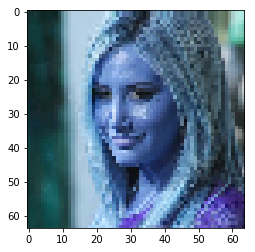

Male


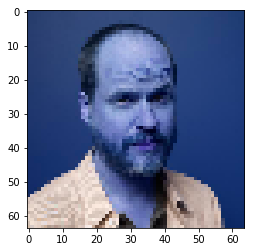

Male


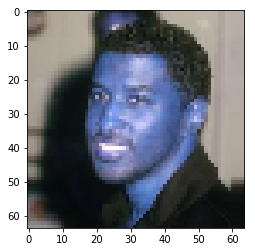

Male


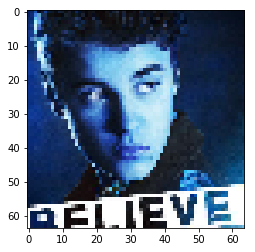

Male


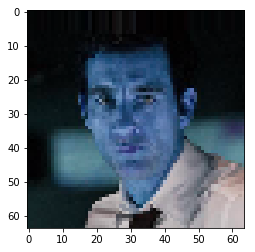

In [3]:
%matplotlib inline
%pylab inline
from matplotlib import pyplot as plt
#import cv2
random_numbers = np.random.randint(0,len(X_train),5)
for i in random_numbers:
    if Y_train[i] == 0:
        print ('female')
    else:
        print ('Male')
    #cv2.imshow(str(i),X_train[i])
    plt.imshow(X_train[i] * 255)
    plt.show()

In [4]:
X_train[0].max()

255.0

In [5]:
X_train = X_train / 255.0

In [6]:
input_layer = Input(shape = (64,64,3))
Conv_layer1 = Convolution2D(16, (5,5),padding='same', activation = "relu")(input_layer)
Max_layer1 = MaxPooling2D(pool_size = (2, 2))(Conv_layer1)
Conv_layer2 = Convolution2D(32, (5,5),padding='same', activation = "relu")(Max_layer1)
Max_layer2 = MaxPooling2D(pool_size = (2, 2))(Conv_layer2)
Conv_layer3 = Convolution2D(32, (5,5),padding='same', activation = "relu")(Max_layer2)
Max_layer3 = MaxPooling2D(pool_size = (2, 2))(Conv_layer3)
Vector = Flatten()(Max_layer3)
Dense1 = Dense(output_dim = 256, activation = "relu")(Vector)
Dropout1 = Dropout(0.35)(Dense1)
Dense2 = Dense(output_dim = 256, activation = "relu")(Dropout1)
Dropout2 = Dropout(0.4)(Dense2)
Dense3 = Dense(output_dim = 1, activation = "sigmoid")(Dropout2)
CNN_model = Model(input_layer,Dense3)
#SGD = optimizers.SGD(lr=0.003)
CNN_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

/home/immortal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  if __name__ == '__main__':
/home/immortal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  # This is added back by InteractiveShellApp.init_path()
/home/immortal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  del sys.path[0]


In [7]:
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [ ]:
CNN_model.fit(X_train, Y_train, batch_size=32, epochs=1)

Epoch 1/1
16480/20000 [=======================>......] - ETA: 40s - loss: 0.1940 - acc: 0.9255

In [12]:
CNN_model.save('CNN_model_trained_64_v1.model')